In [ ]:
#CUSTOMER SEGMENTATION AND ANALYSIS

#Perform customer segmentation analysis on a retail dataset to identify distinct customer
#segments based on purchasing behavior. Use clustering techniques like K-means or
#DBSCAN to group customers and analyze segment characteristics.

In [2]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('/content/retail_sales_dataset.csv')
data



,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [7]:
x = data[['Quantity','Price per Unit']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [9]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

In [10]:
for cluster in data['KMeans_Cluster'].unique():
  segment = data[data['KMeans_Cluster'] == cluster]
  print(f"Cluster {cluster}: ")
  print(segment[['Quantity','Price per Unit']].describe())


Cluster 1: 
         Quantity  Price per Unit
count  289.000000      289.000000
mean     3.553633       35.501730
std      0.497977       11.071461
min      3.000000       25.000000
25%      3.000000       25.000000
50%      4.000000       30.000000
75%      4.000000       50.000000
max      4.000000       50.000000
Cluster 2: 
         Quantity  Price per Unit
count  148.000000           148.0
mean     3.000000           500.0
std      0.816497             0.0
min      2.000000           500.0
25%      2.000000           500.0
50%      3.000000           500.0
75%      4.000000           500.0
max      4.000000           500.0
Cluster 0: 
         Quantity  Price per Unit
count  315.000000      315.000000
mean     1.504762       35.015873
std      0.500773       10.953713
min      1.000000       25.000000
25%      1.000000       25.000000
50%      2.000000       30.000000
75%      2.000000       50.000000
max      2.000000       50.000000
Cluster 3: 
       Quantity  Price per Unit
co

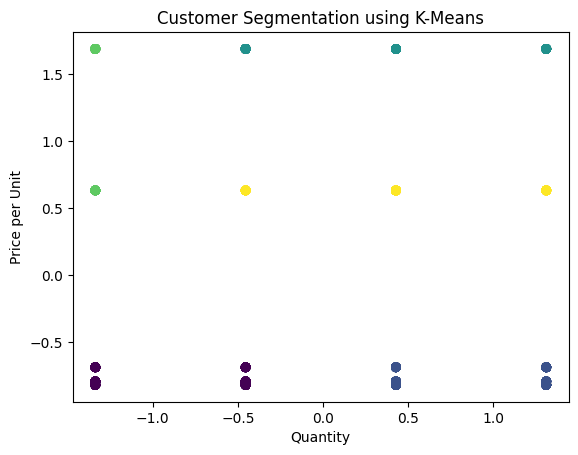

In [11]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=data['KMeans_Cluster'])
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Quantity')
plt.ylabel('Price per Unit')
plt.show()